<a href="https://colab.research.google.com/github/PIYUSHSRI053/Colour-game/blob/main/Chat_Bot_ByPiyush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/drive/MyDrive/ChatBot_Massive_Dataset.csv")

In [3]:
df = df[['question', 'category', 'answer']].dropna()

In [4]:
X = df['question']
y = df['category']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train

,question
6242,What is the capital of Canada?
12401,Maharashtra ki capital kya hai aur kitne distr...
7223,Brazil ki capital kya hai?
10152,What is the capital of United Kingdom?
11573,Gujarat ki capital kya hai aur kitne district ...
...,...
11964,What is the capital of United States?
21575,What should I eat for breakfast?
5390,What is the capital of United States?
860,Give me a brief about How to prepare for exams...


In [7]:
vectorizer_cls = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer_cls.fit_transform(X_train)
X_test_vec = vectorizer_cls.transform(X_test)

In [8]:
#SVM
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)

LinearSVC()

In [9]:
svm_pred = svm_model.predict(X_test_vec)

In [10]:
metrics.accuracy_score(svm_pred, y_test)

0.9988423246121787

In [11]:
#DecisionTree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_vec, y_train)

DecisionTreeClassifier()

In [12]:
dt_pred = dt_model.predict(X_test_vec)

In [13]:
metrics.accuracy_score(dt_pred, y_test)

0.998147719379486

In [14]:
print("\n MODEL PERFORMANCE:")
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred):.2f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.2f}")


 MODEL PERFORMANCE:
SVM Accuracy: 1.00
Decision Tree Accuracy: 1.00


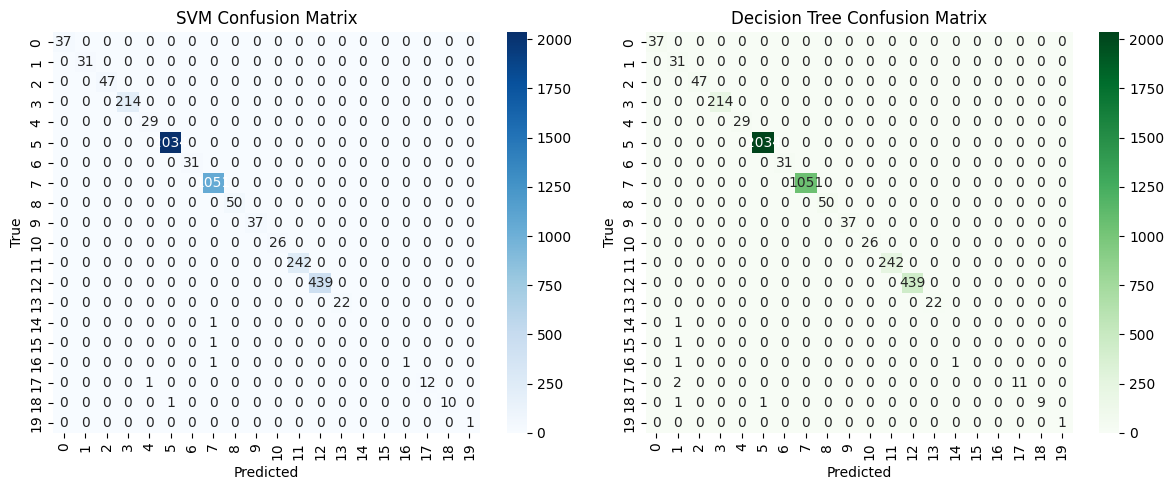

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

In [16]:
best_model = svm_model if accuracy_score(y_test, svm_pred) > accuracy_score(y_test, dt_pred) else dt_model
print("\n Using Best Model for Chatbot:", "SVM" if best_model == svm_model else "Decision Tree")


 Using Best Model for Chatbot: SVM


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

vectorizer_chat = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer_chat.fit_transform(df['question'])

def get_best_answer(user_input):
    user_vec = vectorizer_chat.transform([user_input])
    similarity = cosine_similarity(user_vec, tfidf_matrix)
    idx = similarity.argmax()
    score = similarity[0][idx]
    if score < 0.3:
        return "I'm not sure about that. Please ask something else."
    return df.iloc[idx]['answer']
    print("Chatbot:", chatbot_response(user_input))

In [18]:
print("\n Smart Chatbot Ready! Type 'quit' to exit.\n")
while True:
    user_input = input("You: ")
    if user_input.lower() in ['quit','exit','bye']:
        print("Chatbot: Goodbye! ")
        break
    print("Chatbot:", get_best_answer(user_input))


 Smart Chatbot Ready! Type 'quit' to exit.

You: hello
Chatbot: Hi there! How can I help you today?
You: capital of india
Chatbot: The capital of India is New Delhi.
You: can you tell me about ms
Chatbot: I would tell you a chemistry joke, but I know I wouldn't get a reaction.


KeyboardInterrupt: Interrupted by user